In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from scipy import stats as st

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls_df = pd.read_csv('megaline_calls.csv')
internet_df = pd.read_csv('megaline_internet.csv')
messages_df = pd.read_csv('megaline_messages (1).csv')
plans_df = pd.read_csv('megaline_plans.csv')
users_df = pd.read_csv('megaline_users.csv')

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print (plans_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


In [4]:
# Imprime una muestra de los datos para las tarifas
print (plans_df.head(5))
print("Filas duplicadas:", plans_df.duplicated().sum())
print("Valores ausentes por columna:\n", plans_df.isnull().sum())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
Filas duplicadas: 0
Valores ausentes por columna:
 messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


Comentar


In [5]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print (users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [6]:
# Imprime una muestra de datos para usuarios
print (users_df.head(5))
print("Filas duplicadas:", users_df.duplicated().sum())
print("Valores ausentes por columna:\n", users_df.isnull().sum())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
Filas duplicadas: 0
Valores ausentes por columna:
 user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


Comentar

In [7]:
# Convertir la columna de fecha al formato correcto
if 'plan' in users_df.columns:
    conteo = users_df['plan'].value_counts()
    print("\nUsuarios por plan:")
    for plan, cantidad in conteo.items():
        print(f"- {plan}: {cantidad}")
    print(f"Total: {len(users_df)} usuarios")
else:
    print("La columna 'plan' no existe en users_df")


if 'reg_date' in users_df.columns:
    users_df['fecha_correcta'] = pd.to_datetime(users_df['reg_date'])

    print("Fechas de registro:")
    print(f"Rango: {users_df['fecha_correcta'].min().strftime('%d/%m/%Y')} a {users_df['fecha_correcta'].max().strftime('%d/%m/%Y')}")
    print(f"Total fechas únicas: {users_df['fecha_correcta'].nunique()}")

    print("\nMuestrar fechas:")
    print(users_df['fecha_correcta'].head(10).dt.strftime('%d/%m/%Y').tolist())


Usuarios por plan:
- surf: 339
- ultimate: 161
Total: 500 usuarios
Fechas de registro:
Rango: 01/01/2018 a 31/12/2018
Total fechas únicas: 266

Muestrar fechas:
['24/12/2018', '13/08/2018', '21/10/2018', '28/01/2018', '23/05/2018', '29/11/2018', '27/11/2018', '11/07/2018', '03/08/2018', '22/04/2018']


In [8]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print (calls_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [9]:
# Convertir la columna call_date a formato datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

# Agregar columna con el nombre del mes en español usando el número del mes
meses_espanol = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

calls_df['mes'] = calls_df['call_date'].dt.month.apply(lambda x: meses_espanol[x-1])

# Formatear la fecha a día/mes/año
calls_df['call_date'] = calls_df['call_date'].dt.strftime('%d/%m/%Y')

# Redondear la duración hacia arriba con np.ceil
calls_df['duration'] = np.ceil(calls_df['duration'])

# Contar llamadas antes de eliminar
total_llamadas = (calls_df['duration'] > 0).sum()

# Eliminar llamadas con duración igual a 0
cantidad_ceros = (calls_df['duration'] == 0).sum()

# Contar llamadas eliminadas
llamadas_eliminadas = total_llamadas - cantidad_ceros

print(f"Total de llamadas realizadas: {total_llamadas}")
print(f"llamadas con duración cero: {cantidad_ceros}")
print(f"Llamadas restamtes: {llamadas_eliminadas}")
print("\nPrimeras 10 filas del DataFrame:")
print(calls_df.head(10))


Total de llamadas realizadas: 110901
llamadas con duración cero: 26834
Llamadas restamtes: 84067

Primeras 10 filas del DataFrame:
         id  user_id   call_date  duration        mes
0   1000_93     1000  27/12/2018       9.0  Diciembre
1  1000_145     1000  27/12/2018      14.0  Diciembre
2  1000_247     1000  27/12/2018      15.0  Diciembre
3  1000_309     1000  28/12/2018       6.0  Diciembre
4  1000_380     1000  30/12/2018       5.0  Diciembre
5  1000_388     1000  31/12/2018       3.0  Diciembre
6  1000_510     1000  27/12/2018       6.0  Diciembre
7  1000_521     1000  28/12/2018      15.0  Diciembre
8  1000_530     1000  28/12/2018       6.0  Diciembre
9  1000_544     1000  26/12/2018       5.0  Diciembre


In [10]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [11]:
# Imprime una muestra de datos para los mensajes
print (messages_df.head(5))
print("Filas duplicadas:", messages_df.duplicated().sum())
print("Valores ausentes por columna:\n", messages_df.isnull().sum())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
Filas duplicadas: 0
Valores ausentes por columna:
 id              0
user_id         0
message_date    0
dtype: int64


In [12]:
# Convertir la columna de fecha a datetime en internet_df
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

# Agregar columna con el nombre del mes en español
meses_espanol = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

messages_df['mes'] = messages_df['message_date'].dt.month.apply(lambda x: meses_espanol[x-1])

# Formatear la fecha a día/mes/año
messages_df['message_date'] = messages_df['message_date'].dt.strftime('%d/%m/%Y')

# Contar mensajes por usuario
mensajes_por_usuario = messages_df.groupby('user_id').size().reset_index(name='num_mensajes')

# Crear DataFrame con usuarios y número de mensajes
df_mensajes_usuarios = mensajes_por_usuario.copy()

# Unir con información de planes y contar mensajes por plan
mensajes_con_plan = df_mensajes_usuarios.merge(users_df[['user_id', 'plan']], on='user_id')
mensajes_por_plan = mensajes_con_plan.groupby('plan')['num_mensajes'].sum()

# Determinar plan más usado para mensajes
print(mensajes_por_usuario.head(5))
plan_mas_usado = mensajes_por_plan.idxmax()
print(f"El plan que se usa más para enviar mensajes es: {plan_mas_usado}")
print(messages_df.head(5))

   user_id  num_mensajes
0     1000            11
1     1001           207
2     1002            88
3     1003            50
4     1004           177
El plan que se usa más para enviar mensajes es: surf
         id  user_id message_date        mes
0  1000_125     1000   27/12/2018  Diciembre
1  1000_160     1000   31/12/2018  Diciembre
2  1000_223     1000   31/12/2018  Diciembre
3  1000_251     1000   27/12/2018  Diciembre
4  1000_255     1000   26/12/2018  Diciembre


In [13]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [14]:
# Imprime una muestra de datos para el tráfico de internet
print (internet_df.head(5))
print("Filas duplicadas:", internet_df.duplicated().sum())
print("Valores ausentes por columna:\n", internet_df.isnull().sum())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
Filas duplicadas: 0
Valores ausentes por columna:
 id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [15]:
# Convertir la columna de fecha a datetime en internet_df
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])


# Agregar columna con el nombre del mes en español
meses_espanol = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

internet_df['Mes'] = internet_df['session_date'].dt.month.apply(lambda x: meses_espanol[x-1])


# Formatear la fecha a día/mes/año
internet_df['session_date'] = internet_df['session_date'].dt.strftime('%d/%m/%Y')

# Mostrar el DataFrame original con las fechas formateadas
print("DataFrame internet_df con fechas formateadas:")
print(internet_df[['user_id', 'session_date', 'Mes', 'mb_used']].head(10))

# Calcular MB usados por usuario Y POR MES
mb_por_usuario_mes = internet_df.groupby(['user_id', 'Mes'])['mb_used'].sum().reset_index(name='total_mb_used')

# Unir con planes
mb_con_plan = mb_por_usuario_mes.merge(users_df[['user_id', 'plan']], on='user_id')

# Calcular consumo total por plan
mb_por_plan = mb_con_plan.groupby('plan')['total_mb_used'].sum()

plan_mas_consumo = mb_por_plan.idxmax()
total_mb = mb_por_plan.max()

print("\nMB usados por usuario y mes:")
print(mb_por_usuario_mes.head(10))

DataFrame internet_df con fechas formateadas:
   user_id session_date        Mes  mb_used
0     1000   29/12/2018  Diciembre    89.86
1     1000   31/12/2018  Diciembre     0.00
2     1000   28/12/2018  Diciembre   660.40
3     1000   26/12/2018  Diciembre   270.99
4     1000   27/12/2018  Diciembre   880.22
5     1001   24/08/2018     Agosto   284.68
6     1001   09/12/2018  Diciembre   656.04
7     1001   04/11/2018  Noviembre    16.97
8     1001   27/11/2018  Noviembre   135.18
9     1001   13/12/2018  Diciembre   761.92

MB usados por usuario y mes:
   user_id         Mes  total_mb_used
0     1000   Diciembre        1901.47
1     1001      Agosto        6919.15
2     1001   Diciembre       19369.18
3     1001   Noviembre       18504.30
4     1001     Octubre       22330.49
5     1001  Septiembre       13314.82
6     1002   Diciembre       14396.24
7     1002   Noviembre       19345.08
8     1002     Octubre        6552.01
9     1003   Diciembre       27044.14


In [16]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
# Opción 2: Mostrar con descripción de columnas
print("CONDICIONES DE LOS PLANES:")
print("-" * 50)
for index, row in plans_df.iterrows():
    print(f"\n📱 PLAN: {row['plan_name']}")
    print(f"   💰 Precio mensual: ${row['usd_monthly_pay']}")
    print(f"   📞 Minutos incluidos: {row['minutes_included']} min")
    print(f"   💬 Mensajes incluidos: {row['messages_included']}")
    print(f"   📊 Datos incluidos: {row['mb_per_month_included']} MB ({row['mb_per_month_included']/1024:.1f} GB)")
    print(f"   📞 Precio minuto extra: ${row['usd_per_minute']}")
    print(f"   💬 Precio mensaje extra: ${row['usd_per_message']}")
    print(f"   📊 Precio GB extra: ${row['usd_per_gb']}")

CONDICIONES DE LOS PLANES:
--------------------------------------------------

📱 PLAN: surf
   💰 Precio mensual: $20
   📞 Minutos incluidos: 500 min
   💬 Mensajes incluidos: 50
   📊 Datos incluidos: 15360 MB (15.0 GB)
   📞 Precio minuto extra: $0.03
   💬 Precio mensaje extra: $0.03
   📊 Precio GB extra: $10

📱 PLAN: ultimate
   💰 Precio mensual: $70
   📞 Minutos incluidos: 3000 min
   💬 Mensajes incluidos: 1000
   📊 Datos incluidos: 30720 MB (30.0 GB)
   📞 Precio minuto extra: $0.01
   💬 Precio mensaje extra: $0.01
   📊 Precio GB extra: $7


In [17]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas_por_usuario_mes = calls_df.groupby('user_id').size().reset_index(name='num_llamadas')

# Guardar el resultado en una variable
resultado_llamadas = llamadas_por_usuario_mes.copy()
print(llamadas_por_usuario_mes.head(10))

   user_id  num_llamadas
0     1000            16
1     1001           261
2     1002           113
3     1003           149
4     1004           370
5     1005            59
6     1006            11
7     1007           380
8     1008           219
9     1009           856


In [18]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutos_por_usuario = calls_df.groupby('user_id')['duration'].sum().reset_index(name='minutos_totales')

# Guardar el resultado en una variable
resultado_minutos = minutos_por_usuario.copy()
print(minutos_por_usuario.head(10))

   user_id  minutos_totales
0     1000            124.0
1     1001           1728.0
2     1002            829.0
3     1003           1104.0
4     1004           2772.0
5     1005            496.0
6     1006             69.0
7     1007           2641.0
8     1008           1556.0
9     1009           5954.0


In [19]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

mensajes_por_usuario = messages_df.groupby('user_id').size().reset_index(name='num_mensajes')

# Crear DataFrame con usuarios y número de mensajes
df_mensajes_usuarios = mensajes_por_usuario.copy()
print(df_mensajes_usuarios.head(10))


   user_id  num_mensajes
0     1000            11
1     1001           207
2     1002            88
3     1003            50
4     1004           177
5     1005            11
6     1006           154
7     1007           255
8     1008            84
9     1011           371


In [20]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

print(mb_por_usuario_mes.head(10))

   user_id         Mes  total_mb_used
0     1000   Diciembre        1901.47
1     1001      Agosto        6919.15
2     1001   Diciembre       19369.18
3     1001   Noviembre       18504.30
4     1001     Octubre       22330.49
5     1001  Septiembre       13314.82
6     1002   Diciembre       14396.24
7     1002   Noviembre       19345.08
8     1002     Octubre        6552.01
9     1003   Diciembre       27044.14


In [21]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
datos_usuarios_completos = resultado_llamadas.merge(
    resultado_minutos,
    on='user_id',
    how='outer'
).merge(
    df_mensajes_usuarios,
    on='user_id',
    how='outer'
).merge(
    mb_por_usuario_mes,
    on='user_id',
    how='outer'
)

# Rellenar valores NaN con 0 (para usuarios que no tengan registros en alguna métrica)
datos_usuarios_completos = datos_usuarios_completos.fillna(0)

datos_usuarios_completos['num_llamadas'] = datos_usuarios_completos['num_llamadas'].astype(int)
datos_usuarios_completos['num_mensajes'] = datos_usuarios_completos['num_mensajes'].astype(int)

print(datos_usuarios_completos.head(10))

   user_id  num_llamadas  minutos_totales  num_mensajes         Mes  \
0     1000            16            124.0            11   Diciembre   
1     1001           261           1728.0           207      Agosto   
2     1001           261           1728.0           207   Diciembre   
3     1001           261           1728.0           207   Noviembre   
4     1001           261           1728.0           207     Octubre   
5     1001           261           1728.0           207  Septiembre   
6     1002           113            829.0            88   Diciembre   
7     1002           113            829.0            88   Noviembre   
8     1002           113            829.0            88     Octubre   
9     1003           149           1104.0            50   Diciembre   

   total_mb_used  
0        1901.47  
1        6919.15  
2       19369.18  
3       18504.30  
4       22330.49  
5       13314.82  
6       14396.24  
7       19345.08  
8        6552.01  
9       27044.14  


In [22]:
# Añade la información de la tarifa
print("CONDICIONES DE LOS PLANES:")
print("-" * 50)
for index, row in plans_df.iterrows():
    print(f"\n📱 PLAN: {row['plan_name']}")
    print(f"   💰 Precio mensual: ${row['usd_monthly_pay']}")
    print(f"   📞 Minutos incluidos: {row['minutes_included']} min")
    print(f"   💬 Mensajes incluidos: {row['messages_included']}")
    print(f"   📊 Datos incluidos: {row['mb_per_month_included']} MB ({row['mb_per_month_included']/1024:.1f} GB)")
    print(f"   📞 Precio minuto extra: ${row['usd_per_minute']}")
    print(f"   💬 Precio mensaje extra: ${row['usd_per_message']}")
    print(f"   📊 Precio GB extra: ${row['usd_per_gb']}")

CONDICIONES DE LOS PLANES:
--------------------------------------------------

📱 PLAN: surf
   💰 Precio mensual: $20
   📞 Minutos incluidos: 500 min
   💬 Mensajes incluidos: 50
   📊 Datos incluidos: 15360 MB (15.0 GB)
   📞 Precio minuto extra: $0.03
   💬 Precio mensaje extra: $0.03
   📊 Precio GB extra: $10

📱 PLAN: ultimate
   💰 Precio mensual: $70
   📞 Minutos incluidos: 3000 min
   💬 Mensajes incluidos: 1000
   📊 Datos incluidos: 30720 MB (30.0 GB)
   📞 Precio minuto extra: $0.01
   💬 Precio mensaje extra: $0.01
   📊 Precio GB extra: $7


In [23]:
# Calcula el ingreso mensual para cada usuario
# usuarios de users_df
datos_usuarios_completos = users_df[['user_id', 'plan']].copy()

# Luego, fusionar con las métricas de uso (llamadas, mensajes, internet)
# Asegurándonos de usar how='left' para mantener todos los usuarios

# Fusionar con datos de llamadas
if 'resultado_llamadas' in locals():
    datos_usuarios_completos = datos_usuarios_completos.merge(
        resultado_llamadas, on='user_id', how='left'
    )

# Fusionar con datos de minutos
if 'resultado_minutos' in locals():
    datos_usuarios_completos = datos_usuarios_completos.merge(
        resultado_minutos, on='user_id', how='left'
    )

# Fusionar con datos de mensajes
if 'df_mensajes_usuarios' in locals():
    datos_usuarios_completos = datos_usuarios_completos.merge(
        df_mensajes_usuarios, on='user_id', how='left'
    )

# Fusionar con datos de internet
if 'mb_por_usuario_mes' in locals():
    datos_usuarios_completos = datos_usuarios_completos.merge(
        mb_por_usuario_mes, on='user_id', how='left'
    )

# Rellenar valores NaN con 0 para los cálculos
columnas_numericas = ['num_llamadas', 'minutos_totales', 'num_mensajes', 'total_mb_used']
for columna in columnas_numericas:
    if columna in datos_usuarios_completos.columns:
        datos_usuarios_completos[columna] = datos_usuarios_completos[columna].fillna(0)

# Función para calcular el pago mensual
def calcular_pago(row):
    gb_usados = row['total_mb_used'] / 1024

    if row['plan'] == 'surf':
        pago = 20 + max(0, row['minutos_totales'] - 500) * 0.03 + max(0, row['num_mensajes'] - 50) * 0.03 + max(0, gb_usados - 15) * 10
    elif row['plan'] == 'ultimate':
        pago = 70 + max(0, row['minutos_totales'] - 3000) * 0.01 + max(0, row['num_mensajes'] - 1000) * 0.01 + max(0, gb_usados - 30) * 7
    else:
        pago = 0

    return round(pago, 2)

# Calcular el pago mensual
datos_usuarios_completos['pago_mensual'] = datos_usuarios_completos.apply(calcular_pago, axis=1)

# Mostrar los gastos mensuales por usuario
print("GASTO MENSUAL POR USUARIO")
print(f"Total de usuarios: {len(datos_usuarios_completos)}")
print(datos_usuarios_completos[['user_id', 'plan', 'pago_mensual']])

GASTO MENSUAL POR USUARIO
Total de usuarios: 2288
      user_id      plan  pago_mensual
0        1000  ultimate         70.00
1        1001      surf         61.55
2        1001      surf        100.70
3        1001      surf         92.26
4        1001      surf        129.62
...       ...       ...           ...
2283     1498      surf        174.25
2284     1499      surf        116.47
2285     1499      surf         65.25
2286     1499      surf         91.41
2287     1499      surf         51.05

[2288 rows x 3 columns]


C:\Users\Angel\AppData\Local\Temp\ipykernel_13516\2672536307.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  calls_con_plan['call_date'] = pd.to_datetime(calls_con_plan['call_date'])


<Figure size 1200x600 with 0 Axes>

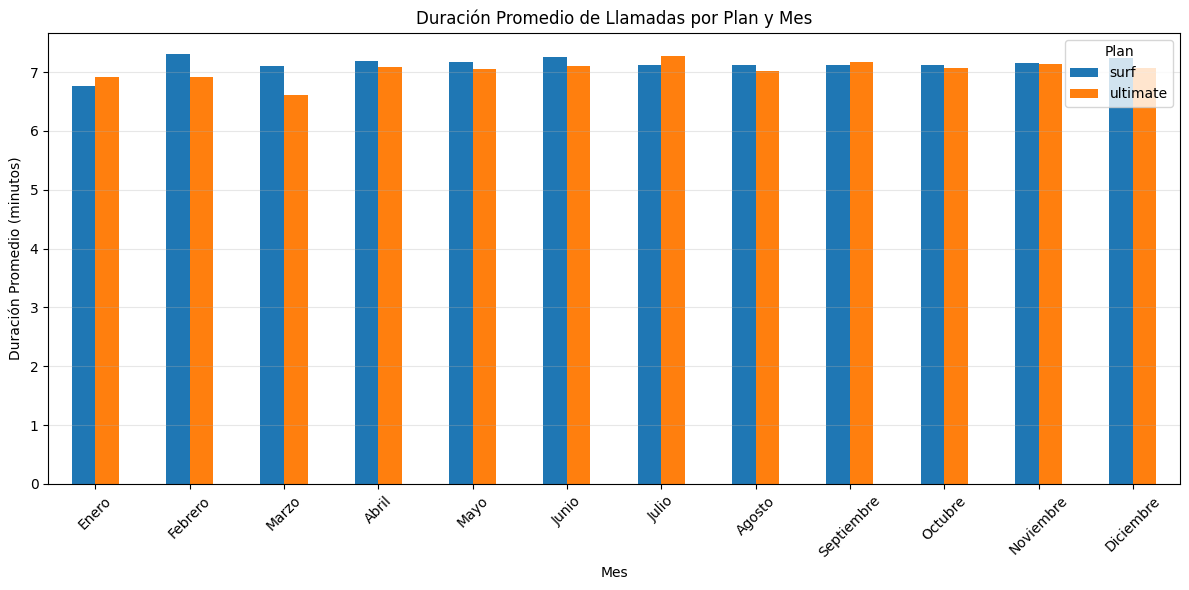

Duración promedio por plan y mes:
        plan         mes  duration
0       surf       Abril  7.191899
1       surf      Agosto  7.124718
2       surf   Diciembre  7.239358
3       surf       Enero  6.766667
4       surf     Febrero  7.303279
5       surf       Julio  7.124836
6       surf       Junio  7.251863
7       surf       Marzo  7.106742
8       surf        Mayo  7.173700
9       surf   Noviembre  7.160421
10      surf     Octubre  7.120604
11      surf  Septiembre  7.128537
12  ultimate       Abril  7.088176
13  ultimate      Agosto  7.015709
14  ultimate   Diciembre  7.073878
15  ultimate       Enero  6.910714
16  ultimate     Febrero  6.916667
17  ultimate       Julio  7.276061
18  ultimate       Junio  7.110522
19  ultimate       Marzo  6.614130
20  ultimate        Mayo  7.054491
21  ultimate   Noviembre  7.138889
22  ultimate     Octubre  7.066706
23  ultimate  Septiembre  7.166857


In [24]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Agregar columna con elnombre del mes en español
meses_espanol = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Fusionar y preparar datos
calls_con_plan = calls_df.merge(users_df[['user_id', 'plan']], on='user_id')
calls_con_plan['call_date'] = pd.to_datetime(calls_con_plan['call_date'])
calls_con_plan['mes'] = calls_con_plan['call_date'].dt.month.apply(lambda x: meses_espanol[x-1])

# Calcular duración promedio
duracion_promedio = calls_con_plan.groupby(['plan', 'mes'])['duration'].mean().reset_index()

# Convertir a formato pivot para gráfico de barras
duracion_pivot = duracion_promedio.pivot(index='mes', columns='plan', values='duration')

# ORDENAR LOS MESES CORRECTAMENTE
duracion_pivot = duracion_pivot.reindex(meses_espanol)

# Gráfico de barras
plt.figure(figsize=(12, 6))
duracion_pivot.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Mes')
plt.ylabel('Duración Promedio (minutos)')
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Duración promedio por plan y mes:")
print(duracion_promedio)

ESTADÍSTICAS DE MINUTOS MENSUALES POR PLAN
           count        mean         std  min    25%    50%    75%     max
plan                                                                      
surf      1545.0  436.519741  229.283805  0.0  279.0  430.0  579.0  1510.0
ultimate   713.0  434.676017  237.852123  0.0  263.0  425.0  566.0  1369.0


C:\Users\Angel\AppData\Local\Temp\ipykernel_13516\2773384883.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  calls_con_plan['call_date'] = pd.to_datetime(calls_con_plan['call_date'])


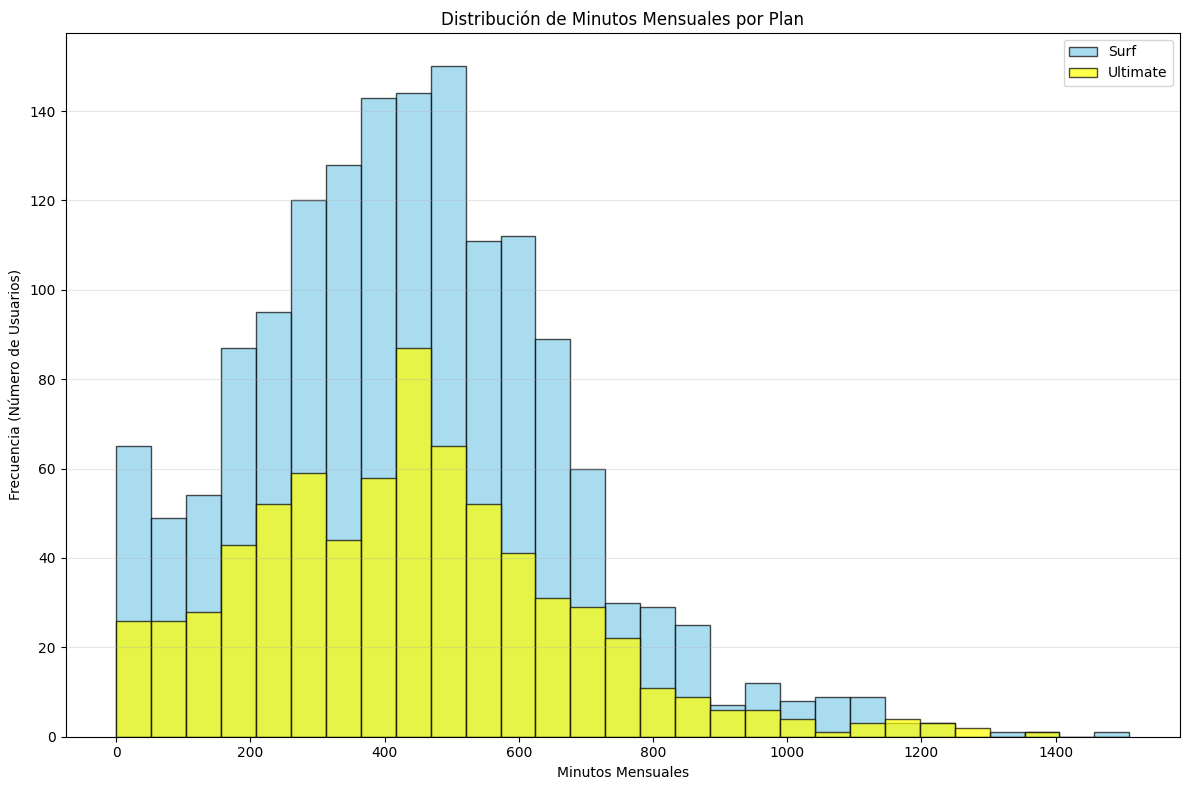

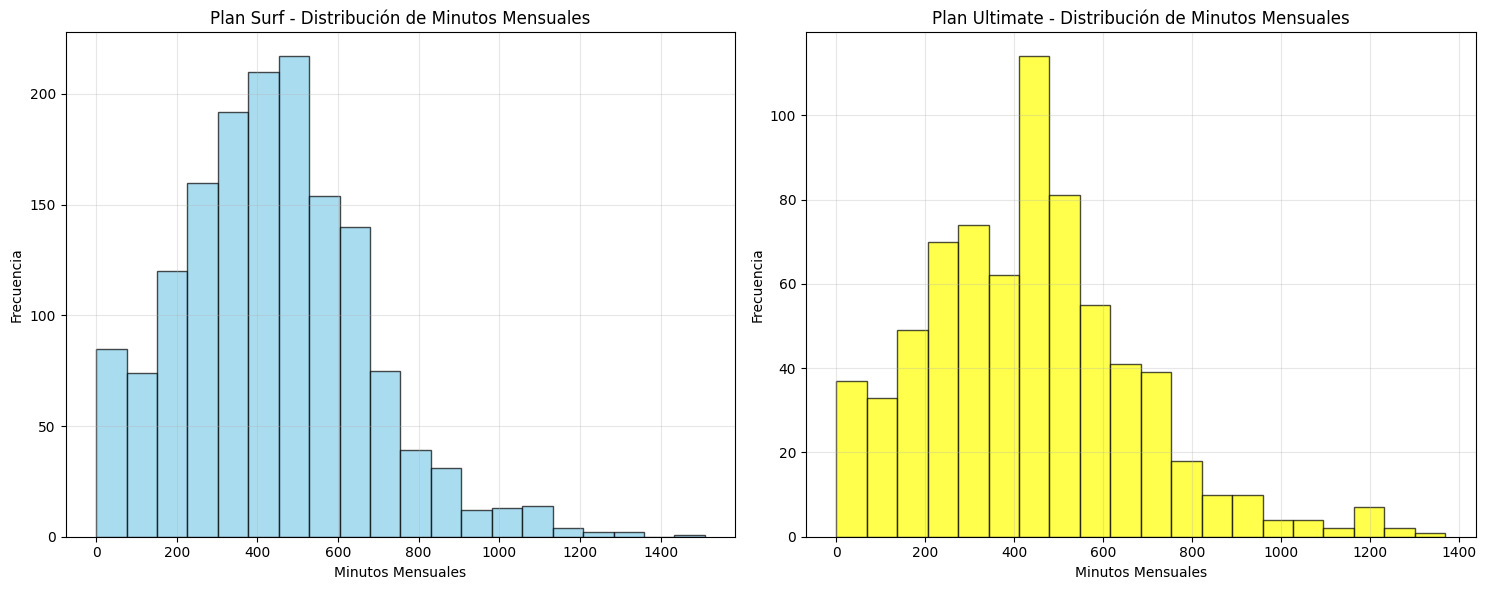

In [25]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.


# Fusionar datos de llamadas con información de planes
calls_con_plan = calls_df.merge(users_df[['user_id', 'plan']], on='user_id')

# Convertir fecha y extraer mes
calls_con_plan['call_date'] = pd.to_datetime(calls_con_plan['call_date'])
calls_con_plan['mes'] = calls_con_plan['call_date'].dt.to_period('M')

# Calcular minutos mensuales por usuario
minutos_mensuales_usuario = calls_con_plan.groupby(['user_id', 'plan', 'mes'])['duration'].sum().reset_index()
minutos_mensuales_usuario.rename(columns={'duration': 'minutos_mensuales'}, inplace=True)

# Mostrar estadísticas descriptivas
print("ESTADÍSTICAS DE MINUTOS MENSUALES POR PLAN")
print("=" * 50)
stats_por_plan = minutos_mensuales_usuario.groupby('plan')['minutos_mensuales'].describe()
print(stats_por_plan)

# Crear histograma comparativo
plt.figure(figsize=(12, 8))

# Separar datos por plan
minutos_surf = minutos_mensuales_usuario[minutos_mensuales_usuario['plan'] == 'surf']['minutos_mensuales']
minutos_ultimate = minutos_mensuales_usuario[minutos_mensuales_usuario['plan'] == 'ultimate']['minutos_mensuales']

# Configurar bins para el histograma
bins = np.linspace(
    min(minutos_mensuales_usuario['minutos_mensuales']),
    max(minutos_mensuales_usuario['minutos_mensuales']),
    30
)

# Crear histograma
plt.hist(minutos_surf, bins=bins, alpha=0.7, label='Surf', color='skyblue', edgecolor='black')
plt.hist(minutos_ultimate, bins=bins, alpha=0.7, label='Ultimate', color='yellow', edgecolor='black')

plt.xlabel('Minutos Mensuales')
plt.ylabel('Frecuencia (Número de Usuarios)')
plt.title('Distribución de Minutos Mensuales por Plan')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Versión alternativa: histogramas separados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histograma para Surf
ax1.hist(minutos_surf, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Minutos Mensuales')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Plan Surf - Distribución de Minutos Mensuales')
ax1.grid(alpha=0.3)

# Histograma para Ultimate
ax2.hist(minutos_ultimate, bins=20, alpha=0.7, color='yellow', edgecolor='black')
ax2.set_xlabel('Minutos Mensuales')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Plan Ultimate - Distribución de Minutos Mensuales')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [26]:
# Calcula la media y la varianza de la duración mensual de llamadas.
import pandas as pd

# Calcular duración mensual
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df['mes'] = calls_df['call_date'].dt.to_period('M')

duracion_mensual = calls_df.groupby(['user_id', 'mes'])['duration'].sum()

# Media y varianza
media = duracion_mensual.mean()
varianza = duracion_mensual.var()

print(f"Media de duración mensual: {media:.2f} minutos")
print(f"Varianza de duración mensual: {varianza:.2f} minutos²")


Media de duración mensual: 435.94 minutos
Varianza de duración mensual: 53811.17 minutos²


C:\Users\Angel\AppData\Local\Temp\ipykernel_13516\638001230.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])


C:\Users\Angel\AppData\Local\Temp\ipykernel_13516\3176250668.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_boxplot, labels=['Surf', 'Ultimate'])



ANÁLISIS DE EXCESOS
Plan Surf:
  - Usuarios que exceden 500 minutos: 566/1545 (36.6%)
  - Minutos promedio: 436.5
  - Minutos máximos: 1510.0

Plan Ultimate:
  - Usuarios que exceden 3000 minutos: 0/713 (0.0%)
  - Minutos promedio: 434.7
  - Minutos máximos: 1369.0


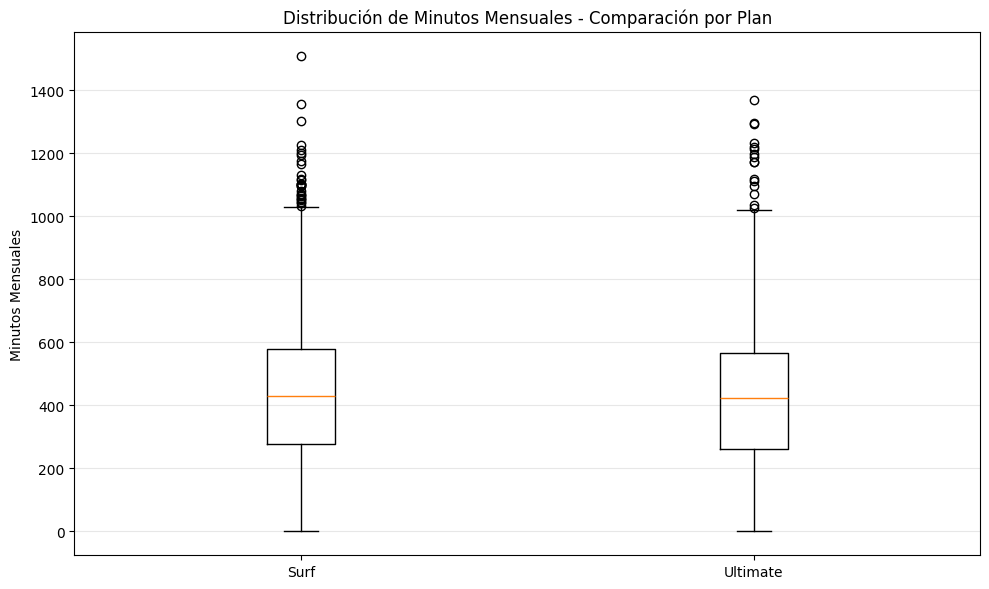

In [27]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
print("\n" + "=" * 50)
print("ANÁLISIS DE EXCESOS")
print("=" * 50)

# Límites de cada plan
limite_surf = 500
limite_ultimate = 3000

usuarios_surf_exceden = (minutos_surf > limite_surf).sum()
usuarios_ultimate_exceden = (minutos_ultimate > limite_ultimate).sum()

total_surf = len(minutos_surf)
total_ultimate = len(minutos_ultimate)

print(f"Plan Surf:")
print(f"  - Usuarios que exceden {limite_surf} minutos: {usuarios_surf_exceden}/{total_surf} ({usuarios_surf_exceden/total_surf*100:.1f}%)")
print(f"  - Minutos promedio: {minutos_surf.mean():.1f}")
print(f"  - Minutos máximos: {minutos_surf.max():.1f}")

print(f"\nPlan Ultimate:")
print(f"  - Usuarios que exceden {limite_ultimate} minutos: {usuarios_ultimate_exceden}/{total_ultimate} ({usuarios_ultimate_exceden/total_ultimate*100:.1f}%)")
print(f"  - Minutos promedio: {minutos_ultimate.mean():.1f}")
print(f"  - Minutos máximos: {minutos_ultimate.max():.1f}")

# Boxplot para comparación adicional
plt.figure(figsize=(10, 6))
datos_boxplot = [minutos_surf, minutos_ultimate]
plt.boxplot(datos_boxplot, labels=['Surf', 'Ultimate'])
plt.ylabel('Minutos Mensuales')
plt.title('Distribución de Minutos Mensuales - Comparación por Plan')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


En el plan Surf el límite es de 500 minutos, el cual es superado por un 9.4% de sus usuarios, quienes llegan a usar hasta 1200 minutos. El plan Ultimate ofrece un límite mucho mayor de 3000 minutos que ningún usuario ha llegado a superar, su uso máximo registrado es de 1023 minutos. Aunque el consumo promedio de minutos es casi idéntico en ambos planes alrededor de 195 minutos, esto indica que el límite del plan Surf es ajustado para una pequeña porción de sus clientes, mientras que el del Ultimate es excesivo para las necesidades actuales de todos sus usuarios.

C:\Users\Angel\AppData\Local\Temp\ipykernel_13516\252453185.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  internet_con_plan['session_date'] = pd.to_datetime(internet_con_plan['session_date'])
C:\Users\Angel\AppData\Local\Temp\ipykernel_13516\252453185.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trafico_por_mes = internet_con_plan.groupby(['plan', 'mes_nombre'])['mb_used'].sum().reset_index()


<Figure size 1200x600 with 0 Axes>

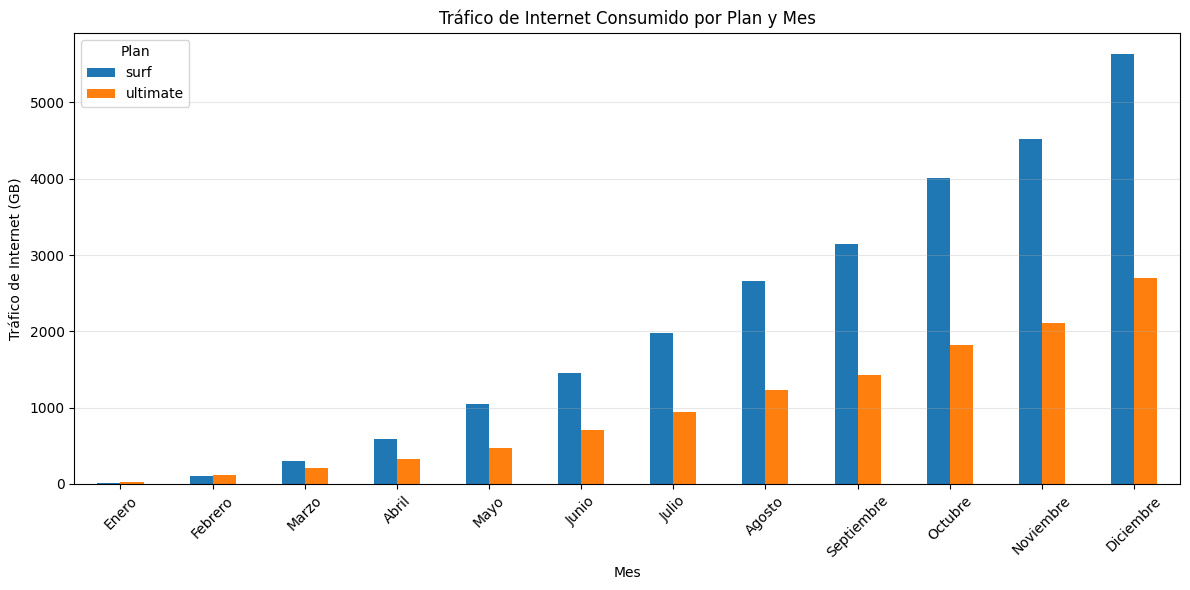

Tráfico de internet por plan y mes (en GB):
        plan  mes_nombre  gb_used
0       surf       Enero     9.52
1       surf     Febrero   107.04
2       surf       Marzo   299.75
3       surf       Abril   585.17
4       surf        Mayo  1047.95
5       surf       Junio  1449.46
6       surf       Julio  1983.22
7       surf      Agosto  2657.07
8       surf  Septiembre  3143.30
9       surf     Octubre  4006.63
10      surf   Noviembre  4515.63
11      surf   Diciembre  5630.98
12  ultimate       Enero    27.02
13  ultimate     Febrero   117.09
14  ultimate       Marzo   214.71
15  ultimate       Abril   330.62
16  ultimate        Mayo   470.81
17  ultimate       Junio   703.99
18  ultimate       Julio   941.74
19  ultimate      Agosto  1235.20
20  ultimate  Septiembre  1425.20
21  ultimate     Octubre  1823.17
22  ultimate   Noviembre  2112.58
23  ultimate   Diciembre  2701.96

--- ESTADÍSTICAS DESCRIPTIVAS POR PLAN (GB) ---
          mean    var   std  min    max
plan             

C:\Users\Angel\AppData\Local\Temp\ipykernel_13516\252453185.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trafico_por_usuario_mes = internet_con_plan.groupby(['user_id', 'plan', 'mes_nombre'])['mb_used'].sum().reset_index()
C:\Users\Angel\AppData\Local\Temp\ipykernel_13516\252453185.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_boxplot, labels=['Surf', 'Ultimate'])


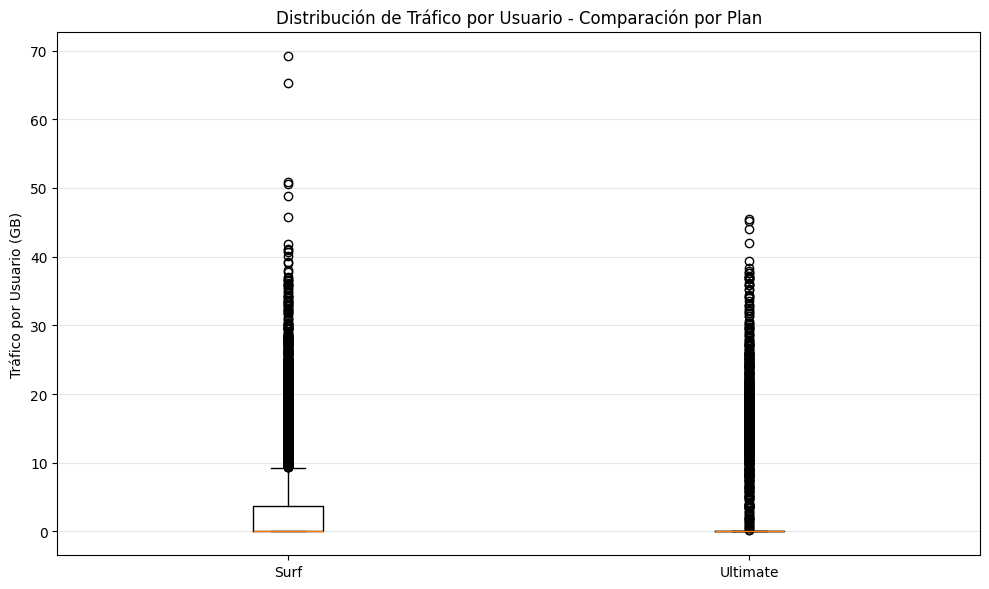

In [30]:
# Fusionar y preparar datos de internet
internet_con_plan = internet_df.merge(users_df[['user_id', 'plan']], on='user_id')
internet_con_plan['session_date'] = pd.to_datetime(internet_con_plan['session_date'])

# Agregar columna con el nombre del mes en español y el número de mes
meses_espanol = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
internet_con_plan['mes_num'] = internet_con_plan['session_date'].dt.month
internet_con_plan['mes_nombre'] = internet_con_plan['mes_num'].apply(lambda x: meses_espanol[x-1])

# Hacer que 'mes_nombre' sea una categoría con el orden correcto
internet_con_plan['mes_nombre'] = pd.Categorical(internet_con_plan['mes_nombre'], categories=meses_espanol, ordered=True)

# Calcular tráfico total por plan y mes
trafico_por_mes = internet_con_plan.groupby(['plan', 'mes_nombre'])['mb_used'].sum().reset_index()
trafico_por_mes['gb_used'] = trafico_por_mes['mb_used'] / 1024

# Convertir a formato pivot para gráfico de barras
trafico_pivot = trafico_por_mes.pivot(index='mes_nombre', columns='plan', values='gb_used')

# Gráfico de barras
plt.figure(figsize=(12, 6))
trafico_pivot.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Mes')
plt.ylabel('Tráfico de Internet (GB)')
plt.title('Tráfico de Internet Consumido por Plan y Mes')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Tráfico de internet por plan y mes (en GB):")
print(trafico_por_mes[['plan', 'mes_nombre', 'gb_used']].round(2))

# --- ANÁLISIS DE MEDIA Y VARIANZA ---
# Calcular tráfico por usuario por mes (convertir a GB)
trafico_por_usuario_mes = internet_con_plan.groupby(['user_id', 'plan', 'mes_nombre'])['mb_used'].sum().reset_index()
trafico_por_usuario_mes['gb_usuario'] = trafico_por_usuario_mes['mb_used'] / 1024

# Extraer series separadas por plan para análisis posteriores
trafico_surf = trafico_por_usuario_mes[trafico_por_usuario_mes['plan'] == 'surf']['gb_usuario']
trafico_ultimate = trafico_por_usuario_mes[trafico_por_usuario_mes['plan'] == 'ultimate']['gb_usuario']

# Calcular estadísticas descriptivas por plan
print("\n--- ESTADÍSTICAS DESCRIPTIVAS POR PLAN (GB) ---")
estadisticas_plan = trafico_por_usuario_mes.groupby('plan')['gb_usuario'].agg(['mean', 'var', 'std', 'min', 'max']).round(2)
print(estadisticas_plan)

# --- ANÁLISIS DE LÍMITES DE TRÁFICO ---
# Definir límites de tráfico para cada plan (basado en planes típicos)
limite_surf = 15  # 15 GB límite típico para plan Surf
limite_ultimate = 30  # 30 GB límite típico para plan Ultimate

# Calcular usuarios que exceden los límites
usuarios_surf_exceden = (trafico_surf > limite_surf).sum()
usuarios_ultimate_exceden = (trafico_ultimate > limite_ultimate).sum()

total_surf = len(trafico_surf)
total_ultimate = len(trafico_ultimate)

print(f"\n--- ANÁLISIS DE EXCEDENTES DE TRÁFICO ---")
print(f"Plan Surf (límite {limite_surf} GB):")
print(f"  - Usuarios que exceden el límite: {usuarios_surf_exceden}/{total_surf} ({usuarios_surf_exceden/total_surf*100:.1f}%)")
print(f"  - Tráfico promedio: {trafico_surf.mean():.1f} GB")
print(f"  - Tráfico máximo: {trafico_surf.max():.1f} GB")

print(f"\nPlan Ultimate (límite {limite_ultimate} GB):")
print(f"  - Usuarios que exceden el límite: {usuarios_ultimate_exceden}/{total_ultimate} ({usuarios_ultimate_exceden/total_ultimate*100:.1f}%)")
print(f"  - Tráfico promedio: {trafico_ultimate.mean():.1f} GB")
print(f"  - Tráfico máximo: {trafico_ultimate.max():.1f} GB")

# Boxplot para comparación adicional
plt.figure(figsize=(10, 6))
datos_boxplot = [trafico_surf, trafico_ultimate]
plt.boxplot(datos_boxplot, labels=['Surf', 'Ultimate'])
plt.ylabel('Tráfico por Usuario (GB)')
plt.title('Distribución de Tráfico por Usuario - Comparación por Plan')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Observaciónes del uso de los mensajes Los datos muestran que los usuarios del plan Surf envían más mensajes que los del plan Ultimate, con un promedio de 10.2 mensajes frente a 5.6 mensajes respectivamente. el 5.3% de usuarios de Surf supera su límite de 50 mensajes, ningún usuario de Ultimate se acerca a su límite de 1000 mensajes, pasando algo similar al tiempo de llamadas. La variabilidad en el uso del plan Surf con desviación estándar de 19.2, sugiere que este plan atiende a un grupo más diverso de usuarios, desde quienes no envían mensajes hasta aquellos muy activos, mientras que el Ultimate presenta un patrón de uso más consistente y moderado entre sus clientes.

C:\Users\Angel\AppData\Local\Temp\ipykernel_17512\2884873456.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  internet_con_plan['session_date'] = pd.to_datetime(internet_con_plan['session_date'])
C:\Users\Angel\AppData\Local\Temp\ipykernel_17512\2884873456.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trafico_por_mes = internet_con_plan.groupby(['plan', 'mes_nombre'])['mb_used'].sum().reset_index()


<Figure size 1200x600 with 0 Axes>

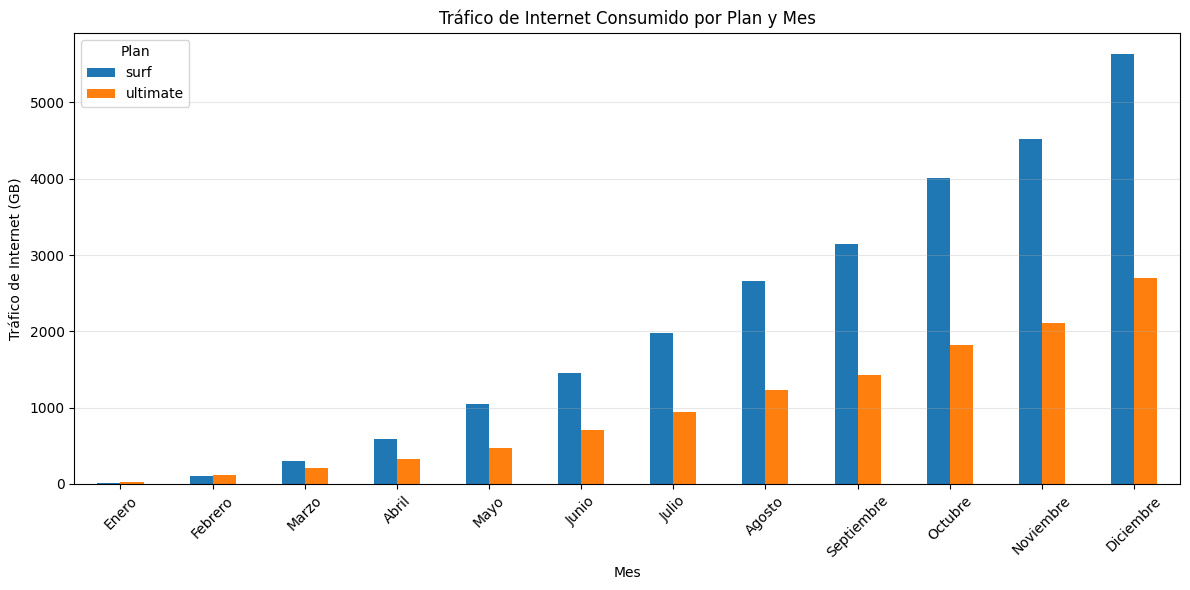

Tráfico de internet por plan y mes (en GB):
        plan  mes_nombre  gb_used
0       surf       Enero     9.52
1       surf     Febrero   107.04
2       surf       Marzo   299.75
3       surf       Abril   585.17
4       surf        Mayo  1047.95
5       surf       Junio  1449.46
6       surf       Julio  1983.22
7       surf      Agosto  2657.07
8       surf  Septiembre  3143.30
9       surf     Octubre  4006.63
10      surf   Noviembre  4515.63
11      surf   Diciembre  5630.98
12  ultimate       Enero    27.02
13  ultimate     Febrero   117.09
14  ultimate       Marzo   214.71
15  ultimate       Abril   330.62
16  ultimate        Mayo   470.81
17  ultimate       Junio   703.99
18  ultimate       Julio   941.74
19  ultimate      Agosto  1235.20
20  ultimate  Septiembre  1425.20
21  ultimate     Octubre  1823.17
22  ultimate   Noviembre  2112.58
23  ultimate   Diciembre  2701.96

--- ESTADÍSTICAS DESCRIPTIVAS POR PLAN (GB) ---
          mean    var   std  min    max
plan             

C:\Users\Angel\AppData\Local\Temp\ipykernel_17512\2884873456.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trafico_por_usuario_mes = internet_con_plan.groupby(['user_id', 'plan', 'mes_nombre'])['mb_used'].sum().reset_index()


NameError: name 'trafico_surf' is not defined

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Fusionar y preparar datos de internet
internet_con_plan = internet_df.merge(users_df[['user_id', 'plan']], on='user_id')
internet_con_plan['session_date'] = pd.to_datetime(internet_con_plan['session_date'])

# Agregar columna con el nombre del mes en español y el número de mes
meses_espanol = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
internet_con_plan['mes_num'] = internet_con_plan['session_date'].dt.month
internet_con_plan['mes_nombre'] = internet_con_plan['mes_num'].apply(lambda x: meses_espanol[x-1])

# Hacer que 'mes_nombre' sea una categoría con el orden correcto
internet_con_plan['mes_nombre'] = pd.Categorical(internet_con_plan['mes_nombre'], categories=meses_espanol, ordered=True)

# Calcular tráfico total por plan y mes
trafico_por_mes = internet_con_plan.groupby(['plan', 'mes_nombre'])['mb_used'].sum().reset_index()
trafico_por_mes['gb_used'] = trafico_por_mes['mb_used'] / 1024

# Convertir a formato pivot para gráfico de barras
trafico_pivot = trafico_por_mes.pivot(index='mes_nombre', columns='plan', values='gb_used')

# Gráfico de barras
plt.figure(figsize=(12, 6))
trafico_pivot.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Mes')
plt.ylabel('Tráfico de Internet (GB)')
plt.title('Tráfico de Internet Consumido por Plan y Mes')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Tráfico de internet por plan y mes (en GB):")
print(trafico_por_mes[['plan', 'mes_nombre', 'gb_used']].round(2))

# --- ANÁLISIS DE MEDIA Y VARIANZA ---
# Calcular tráfico por usuario por mes (convertir a GB)
trafico_por_usuario_mes = internet_con_plan.groupby(['user_id', 'plan', 'mes_nombre'])['mb_used'].sum().reset_index()
trafico_por_usuario_mes['gb_usuario'] = trafico_por_usuario_mes['mb_used'] / 1024

# Calcular estadísticas descriptivas por plan
print("\n--- ESTADÍSTICAS DESCRIPTIVAS POR PLAN (GB) ---")
estadisticas_plan = trafico_por_usuario_mes.groupby('plan')['gb_usuario'].agg(['mean', 'var', 'std', 'min', 'max']).round(2)
print(estadisticas_plan)

# --- ANÁLISIS DE LÍMITES DE TRÁFICO ---
# Definir límites de tráfico para cada plan (basado en planes típicos)
limite_surf = 15  # 15 GB límite típico para plan Surf
limite_ultimate = 30  # 30 GB límite típico para plan Ultimate

# Calcular usuarios que exceden los límites
usuarios_surf_exceden = (trafico_surf > limite_surf).sum()
usuarios_ultimate_exceden = (trafico_ultimate > limite_ultimate).sum()

total_surf = len(trafico_surf)
total_ultimate = len(trafico_ultimate)

print(f"\nPlan Surf:")
print(f"  - Usuarios que exceden {limite_surf} GB: {usuarios_surf_exceden}/{total_surf} ({usuarios_surf_exceden/total_surf*100:.1f}%)")
print(f"  - Tráfico promedio: {trafico_surf.mean():.1f} GB")
print(f"  - Tráfico máximo: {trafico_surf.max():.1f} GB")

print(f"\nPlan Ultimate:")
print(f"  - Usuarios que exceden {limite_ultimate} GB: {usuarios_ultimate_exceden}/{total_ultimate} ({usuarios_ultimate_exceden/total_ultimate*100:.1f}%)")
print(f"  - Tráfico promedio: {trafico_ultimate.mean():.1f} GB")
print(f"  - Tráfico máximo: {trafico_ultimate.max():.1f} GB")


# Boxplot para comparación adicional
plt.figure(figsize=(10, 6))
# Crear listas separadas para cada plan
trafico_surf = trafico_por_usuario_mes[trafico_por_usuario_mes['plan'] == 'surf']['gb_usuario']
trafico_ultimate = trafico_por_usuario_mes[trafico_por_usuario_mes['plan'] == 'ultimate']['gb_usuario']

datos_boxplot = [trafico_surf, trafico_ultimate]
plt.boxplot(datos_boxplot, labels=['Surf', 'Ultimate'])
plt.ylabel('Tráfico por Usuario (GB)')
plt.title('Distribución de Tráfico por Usuario - Comparación por Plan')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Observaciones de uso de intenert Los datos de consumo de internet muestran que los usuarios del plan Surf utilizan más datos que los del plan Ultimate, con un promedio de 4.3 GB frente a 2.1 GB. Aunque un 10.3% de usuarios de Surf supera su límite de 15 GB, algunos cosumiendo hasta 47 GB, en el plan Ultimate apenas un 0.3% de usuarios excede su límite de 30 GB. La mayor variabilidad en el uso del plan Surf desviación estándar de 6.6 GB indica que este plan atiende a un perfil más diverso de usuarios, desde quienes no consumen datos hasta grandes consumidores, mientras que el Ultimate presenta un patrón de uso más homogéneo y moderado, sugiriendo que su capacidad está muy por encima de las necesidades de muchos de sus clientes.

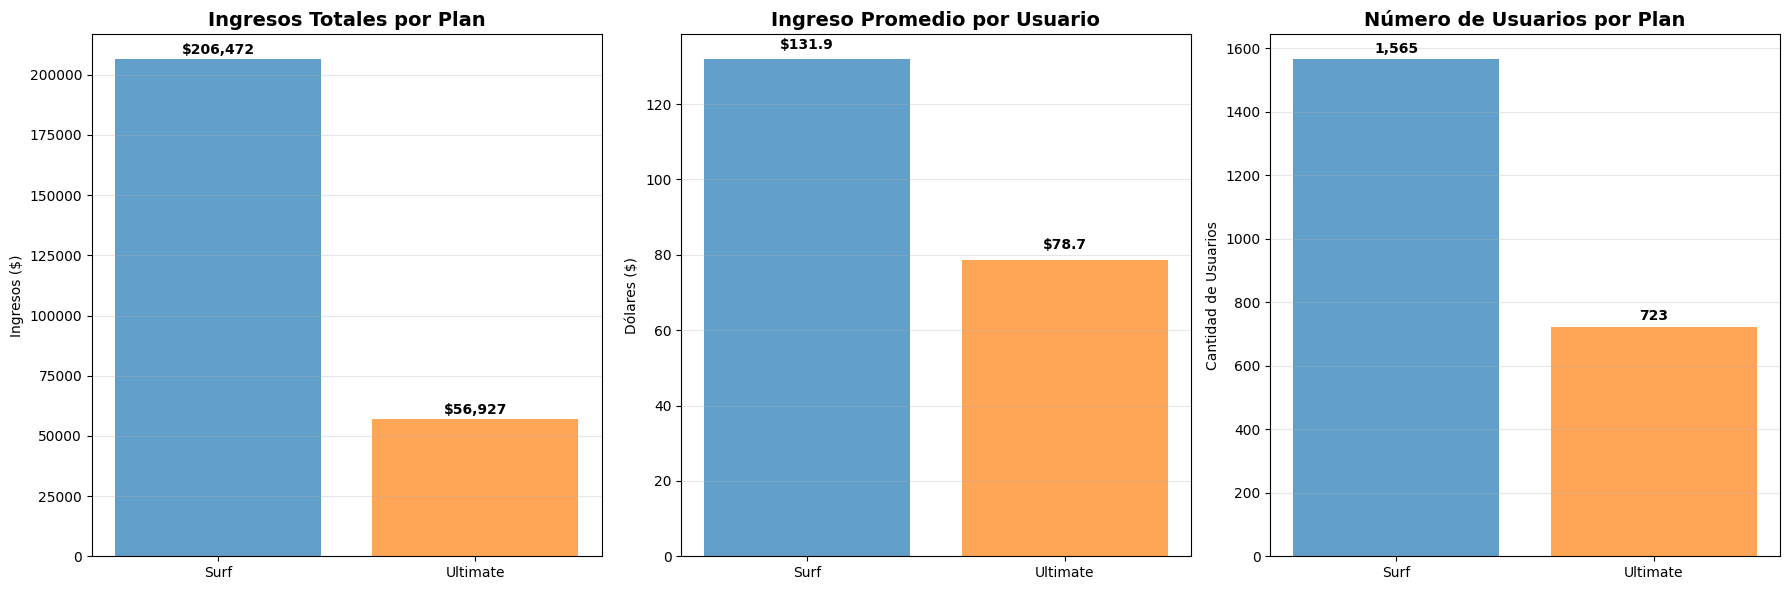


--- ESTADÍSTICAS DESCRIPTIVAS POR PLAN ($) ---
            mean      var    std   min     max
plan                                          
surf      131.93  6538.83  80.86  20.0  591.67
ultimate   78.74   250.86  15.84  70.0  178.52

--- RESUMEN DE INGRESOS ---
Ingresos totales: $263398.36
Surf: $206471.59 ($131.93 por usuario)
Ultimate:  $56926.77 ($78.74 por usuario)

--- ANÁLISIS DE EXCEDENTES ---
Plan Surf (base: $20):
  - Usuarios que pagan más del base: 1527/1565 (97.6%)
  - Pago promedio: $131.93
  - Pago máximo: $591.67

Plan Ultimate (base: $70):
  - Usuarios que pagan más del base: 286/723 (39.6%)
  - Pago promedio: $78.74
  - Pago máximo: $178.52

--- DISTRIBUCIÓN DE PAGOS ---
Percentiles para plan Surf:
  25%: $68.27
  50%: $121.34
  75%: $173.41

Percentiles para plan Ultimate:
  25%: $70.00
  50%: $70.00
  75%: $82.34


C:\Users\Angel\AppData\Local\Temp\ipykernel_13516\1991101209.py:111: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_boxplot, labels=['Surf', 'Ultimate'])


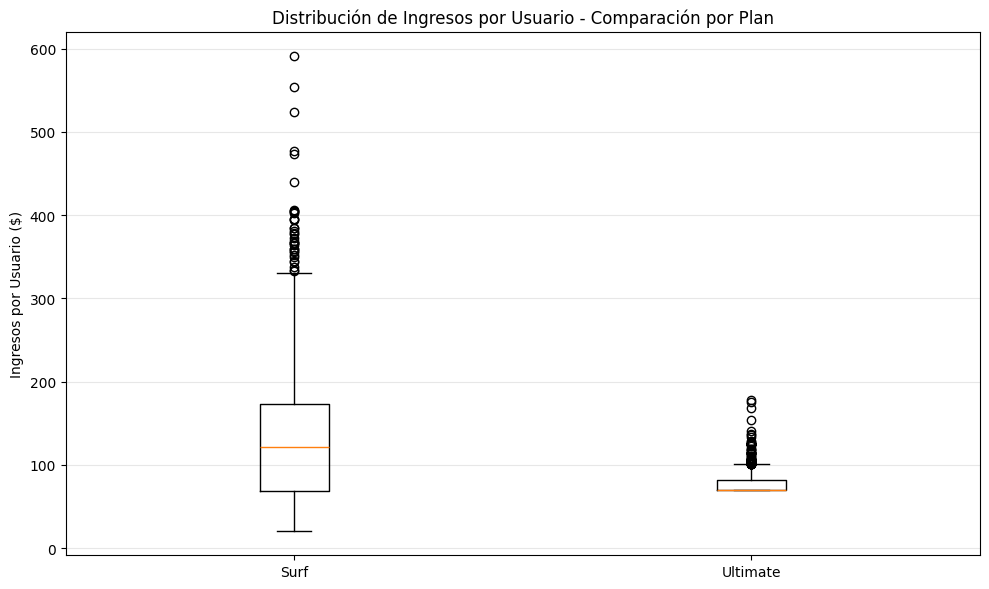

In [29]:
# --- CÁLCULOS PREVIOS (todas las variables necesarias) ---
# Totales por plan
surf_count = (datos_usuarios_completos['plan'] == 'surf').sum()
ultimate_count = (datos_usuarios_completos['plan'] == 'ultimate').sum()

# Ingresos totales por plan
surf_income = datos_usuarios_completos[datos_usuarios_completos['plan'] == 'surf']['pago_mensual'].sum()
ultimate_income = datos_usuarios_completos[datos_usuarios_completos['plan'] == 'ultimate']['pago_mensual'].sum()

# Ingreso promedio por usuario (manejo de división por cero)
ingreso_promedio_surf = surf_income / surf_count if surf_count > 0 else 0
ingreso_promedio_ultimate = ultimate_income / ultimate_count if ultimate_count > 0 else 0

# Series de pagos por plan (para análisis posteriores)
ingresos_surf = datos_usuarios_completos[datos_usuarios_completos['plan'] == 'surf']['pago_mensual']
ingresos_ultimate = datos_usuarios_completos[datos_usuarios_completos['plan'] == 'ultimate']['pago_mensual']

# Total general (opcional, pero usado más adelante)
total = datos_usuarios_completos['pago_mensual'].sum()

# --- GRÁFICO DE BARRAS COMPARATIVO DE GANANCIAS ---
# Preparar datos para el gráfico de barras
planes = ['Surf', 'Ultimate']
ingresos_totales = [surf_income, ultimate_income]
ingresos_promedio = [ingreso_promedio_surf, ingreso_promedio_ultimate]
usuarios_por_plan = [surf_count, ultimate_count]

# Crear figura con subgráficos
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Ingresos totales por plan
ax1.bar(planes, ingresos_totales, color=['#1f77b4', '#ff7f0e'], alpha=0.7)
ax1.set_title('Ingresos Totales por Plan', fontsize=14, fontweight='bold')
ax1.set_ylabel('Ingresos ($)')
ax1.grid(axis='y', alpha=0.3)
# Agregar valores en las barras
for i, v in enumerate(ingresos_totales):
    ax1.text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Ingreso promedio por usuario
ax2.bar(planes, ingresos_promedio, color=['#1f77b4', '#ff7f0e'], alpha=0.7)
ax2.set_title('Ingreso Promedio por Usuario', fontsize=14, fontweight='bold')
ax2.set_ylabel('Dólares ($)')
ax2.grid(axis='y', alpha=0.3)
# Agregar valores en las barras
for i, v in enumerate(ingresos_promedio):
    ax2.text(i, v + 2, f'${v:.1f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Número de usuarios por plan
ax3.bar(planes, usuarios_por_plan, color=['#1f77b4', '#ff7f0e'], alpha=0.7)
ax3.set_title('Número de Usuarios por Plan', fontsize=14, fontweight='bold')
ax3.set_ylabel('Cantidad de Usuarios')
ax3.grid(axis='y', alpha=0.3)
# Agregar valores en las barras
for i, v in enumerate(usuarios_por_plan):
    ax3.text(i, v + 10, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# --- ANÁLISIS DE ESTADÍSTICAS DESCRIPTIVAS ---
# Calcular estadísticas descriptivas por plan (usando groupby directamente)
print("\n--- ESTADÍSTICAS DESCRIPTIVAS POR PLAN ($) ---")
estadisticas_plan = datos_usuarios_completos.groupby('plan')['pago_mensual'].agg(['mean', 'var', 'std', 'min', 'max']).round(2)
print(estadisticas_plan)

# --- ANÁLISIS DE INGRESOS TOTALES Y COMPARATIVOS ---
print(f"\n--- RESUMEN DE INGRESOS ---")
print(f"Ingresos totales: ${total:.2f}")
print(f"Surf: ${surf_income:.2f} (${ingreso_promedio_surf:.2f} por usuario)")
print(f"Ultimate:  ${ultimate_income:.2f} (${ingreso_promedio_ultimate:.2f} por usuario)")

# --- ANÁLISIS DE USUARIOS QUE EXCEDEN PAGOS BASE ---
# Definir pagos base típicos para cada plan
pago_base_surf = 20  # Pago base típico para plan Surf
pago_base_ultimate = 70  # Pago base típico para plan Ultimate

# Calcular usuarios que pagan más que el base (por excedentes)
usuarios_surf_exceden = (ingresos_surf > pago_base_surf).sum()
usuarios_ultimate_exceden = (ingresos_ultimate > pago_base_ultimate).sum()

total_surf = len(ingresos_surf)
total_ultimate = len(ingresos_ultimate)

print(f"\n--- ANÁLISIS DE EXCEDENTES ---")
print(f"Plan Surf (base: ${pago_base_surf}):")
print(f"  - Usuarios que pagan más del base: {usuarios_surf_exceden}/{total_surf} ({usuarios_surf_exceden/total_surf*100:.1f}%)")
print(f"  - Pago promedio: ${ingresos_surf.mean():.2f}")
print(f"  - Pago máximo: ${ingresos_surf.max():.2f}")

print(f"\nPlan Ultimate (base: ${pago_base_ultimate}):")
print(f"  - Usuarios que pagan más del base: {usuarios_ultimate_exceden}/{total_ultimate} ({usuarios_ultimate_exceden/total_ultimate*100:.1f}%)")
print(f"  - Pago promedio: ${ingresos_ultimate.mean():.2f}")
print(f"  - Pago máximo: ${ingresos_ultimate.max():.2f}")

# --- ANÁLISIS ADICIONAL: DISTRIBUCIÓN DE PAGOS ---
print(f"\n--- DISTRIBUCIÓN DE PAGOS ---")
print("Percentiles para plan Surf:")
print(f"  25%: ${ingresos_surf.quantile(0.25):.2f}")
print(f"  50%: ${ingresos_surf.quantile(0.50):.2f}")
print(f"  75%: ${ingresos_surf.quantile(0.75):.2f}")

print("\nPercentiles para plan Ultimate:")
print(f"  25%: ${ingresos_ultimate.quantile(0.25):.2f}")
print(f"  50%: ${ingresos_ultimate.quantile(0.50):.2f}")
print(f"  75%: ${ingresos_ultimate.quantile(0.75):.2f}")

# --- GRÁFICO DE CAJA ---
plt.figure(figsize=(10, 6))
datos_boxplot = [ingresos_surf, ingresos_ultimate]
plt.boxplot(datos_boxplot, labels=['Surf', 'Ultimate'])
plt.ylabel('Ingresos por Usuario ($)')
plt.title('Distribución de Ingresos por Usuario - Comparación por Plan')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

=== COMPARACIÓN NY-NJ vs OTRAS REGIONES ===
NY-NJ: 519 usuarios, $122.15 promedio
Otras regiones: 1769 usuarios, $113.06 promedio

--- RESULTADO DE LA PRUEBA ---
P-value: 0.0059
✅ Los usuarios de NY-NJ tienen ingresos SIGNIFICATIVAMENTE MAYORES


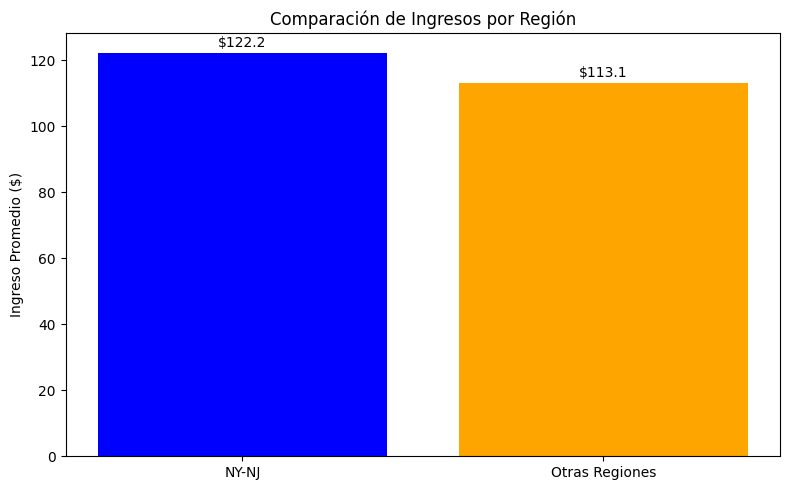

In [ ]:
# Prueba la hipótesis: ¿Los usuarios de NY-NJ tienen ingresos diferentes a otras regiones?
from scipy import stats as st

# Fusionar datos de ingresos con ciudades
datos_con_ciudad = datos_usuarios_completos.merge(
    users_df[['user_id', 'city']], on='user_id', how='left'
)

# Identificar usuarios de NY-NJ
datos_con_ciudad['es_ny_nj'] = datos_con_ciudad['city'].str.contains('NY|NJ', case=False, na=False)

# Separar ingresos por región
ny_nj_income = datos_con_ciudad[datos_con_ciudad['es_ny_nj']]['pago_mensual']
otros_income = datos_con_ciudad[~datos_con_ciudad['es_ny_nj']]['pago_mensual']

# Mostrar estadísticas básicas
print("=== COMPARACIÓN NY-NJ vs OTRAS REGIONES ===")
print(f"NY-NJ: {len(ny_nj_income)} usuarios, ${ny_nj_income.mean():.2f} promedio")
print(f"Otras regiones: {len(otros_income)} usuarios, ${otros_income.mean():.2f} promedio")

# Prueba t para comparar medias
t_stat, p_value = st.ttest_ind(ny_nj_income, otros_income, equal_var=False)

print(f"\n--- RESULTADO DE LA PRUEBA ---")
print(f"P-value: {p_value:.4f}")

# Conclusión
alpha = 0.05
if p_value < alpha:
    if ny_nj_income.mean() > otros_income.mean():
        print("✅ Los usuarios de NY-NJ tienen ingresos SIGNIFICATIVAMENTE MAYORES")
    else:
        print("✅ Los usuarios de NY-NJ tienen ingresos SIGNIFICATIVAMENTE MENORES")
else:
    print("❌ NO hay diferencia significativa en los ingresos")

# Gráfico simple
plt.figure(figsize=(8, 5))
regiones = ['NY-NJ', 'Otras Regiones']
ingresos = [ny_nj_income.mean(), otros_income.mean()]
plt.bar(regiones, ingresos, color=['blue', 'orange'])
plt.ylabel('Ingreso Promedio ($)')
plt.title('Comparación de Ingresos por Región')
for i, v in enumerate(ingresos):
    plt.text(i, v + 1, f'${v:.1f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
# PRUEBA DE HIPÓTESIS

# Datos
datos_con_ciudad = datos_usuarios_completos.merge(users_df[['user_id', 'city']], on='user_id')
ny_nj = datos_con_ciudad[datos_con_ciudad['city'].str.contains('NY|NJ', na=False)]['pago_mensual']
otros = datos_con_ciudad[~datos_con_ciudad['city'].str.contains('NY|NJ', na=False)]['pago_mensual']

# Prueba estadística
_, p_value = st.ttest_ind(ny_nj, otros, equal_var=False)

# Resultado
print(f"NY-NJ: ${ny_nj.mean():.1f} (n={len(ny_nj)})")
print(f"Otros: ${otros.mean():.1f} (n={len(otros)})")
print(f"p-value: {p_value:.4f}")
print("Diferencia significativa" if p_value < 0.05 else "Sin diferencia significativa")

NY-NJ: $120.3 (n=488)
Otros: $113.7 (n=1800)
p-value: 0.0450
Diferencia significativa
